In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('C:/Users/sjkan/Desktop/연세/YBIGTA/22 여름방학/신입기수프로젝트')

# 데이터 불러오기

In [ ]:
data = pd.read_csv('rawdata.csv')
data

In [ ]:
data.isnull().sum()

# 한강대교 조위 결측치 처리
###### 변수 이름은 그대로 gangwha...

In [ ]:
gangwha = data[['날짜', '한강대교_유량']]
gangwha

,날짜,한강대교_유량
0,2012-05-01 00:00,729.80
1,2012-05-01 00:10,731.48
2,2012-05-01 00:20,726.42
3,2012-05-01 00:30,726.42
4,2012-05-01 00:40,707.17
...,...,...
276331,2022-07-18 23:10,-456.41
276332,2022-07-18 23:20,-717.30
276333,2022-07-18 23:30,-843.37
276334,2022-07-18 23:40,-1023.37


In [ ]:
gangwha.날짜 = pd.to_datetime(gangwha.날짜)
gangwha

C:\Users\sjkan\AppData\Local\Temp\ipykernel_15708\4062866498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangwha.날짜 = pd.to_datetime(gangwha.날짜)


,날짜,한강대교_유량
0,2012-05-01 00:00:00,729.80
1,2012-05-01 00:10:00,731.48
2,2012-05-01 00:20:00,726.42
3,2012-05-01 00:30:00,726.42
4,2012-05-01 00:40:00,707.17
...,...,...
276331,2022-07-18 23:10:00,-456.41
276332,2022-07-18 23:20:00,-717.30
276333,2022-07-18 23:30:00,-843.37
276334,2022-07-18 23:40:00,-1023.37


In [ ]:
gangwha[gangwha['한강대교_유량'].isnull()]   # 59개의 결측치 : 순서대로 채우기

,날짜,한강대교_유량
91352,2015-07-22 09:20:00,NaN
91353,2015-07-22 09:30:00,NaN
91354,2015-07-22 09:40:00,NaN
91355,2015-07-22 09:50:00,NaN
91356,2015-07-22 10:00:00,NaN
...,...,...
262130,2021-10-12 08:20:00,NaN
262131,2021-10-12 08:30:00,NaN
262132,2021-10-12 08:40:00,NaN
262133,2021-10-12 08:50:00,NaN


In [ ]:
nan_index = list(gangwha[gangwha['한강대교_유량'].isnull()].index)
nan_index

[91352,
 91353,
 91354,
 91355,
 91356,
 91357,
 91358,
 91359,
 91360,
 91361,
 91362,
 91363,
 91364,
 91365,
 91366,
 91367,
 91368,
 91369,
 91370,
 91371,
 91372,
 91377,
 91378,
 91379,
 91380,
 91381,
 91382,
 91383,
 91384,
 91385,
 91386,
 91387,
 91388,
 91389,
 91390,
 91391,
 91392,
 91393,
 91394,
 91395,
 91396,
 91397,
 91398,
 91399,
 91400,
 91401,
 91402,
 91403,
 91404,
 91405,
 91406,
 91407,
 91408,
 91409,
 91410,
 91411,
 91412,
 91413,
 91414,
 91415,
 91416,
 91417,
 91418,
 91419,
 91420,
 91421,
 91422,
 91423,
 91424,
 91425,
 91426,
 91427,
 91428,
 91429,
 91430,
 91431,
 91432,
 91433,
 91434,
 91435,
 91436,
 91437,
 91438,
 91439,
 91440,
 91441,
 91442,
 91443,
 91444,
 91445,
 91446,
 91447,
 91448,
 91449,
 91450,
 91451,
 91452,
 91453,
 91454,
 91455,
 91456,
 91457,
 91458,
 91459,
 91460,
 91461,
 91462,
 91463,
 91464,
 91465,
 91466,
 91467,
 91468,
 91469,
 91470,
 91471,
 91472,
 91473,
 91474,
 91475,
 91476,
 91477,
 91478,
 91479,
 91480,


In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_sarima.extend(nan_index[-2:])

# if nan_index[-3]+1 != nan_index[-2]:
#     index_interpolate.extend(nan_index[-2:])
# else:
#     index_interpolate.extend(nan_index[-1:])

nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])
index_interpolate_

[236079, 236080, 236081]

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

gangwha_interpolate = gangwha.copy()
gangwha_interpolate = gangwha_interpolate.set_index('날짜')
gangwha_interpolate = gangwha_interpolate.iloc[index_interpolate_, :]
gangwha_interpolate

,한강대교_유량
날짜,
2020-10-15 10:30:00,473.29
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,505.24


In [ ]:
# 보간

gangwha_interpolate.interpolate(method='time', inplace=True)
gangwha_interpolate   # 보간 결과 확인

,한강대교_유량
날짜,
2020-10-15 10:30:00,473.290
2020-10-15 10:40:00,489.265
2020-10-15 10:50:00,505.240


In [ ]:
gangwha_interpolate.isnull().sum()

한강대교_유량    0
dtype: int64

In [ ]:
gangwha = gangwha.set_index('날짜')
gangwha.loc[gangwha_interpolate.index] = gangwha_interpolate
gangwha.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

한강대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

91352

In [ ]:
gangwha

,한강대교_유량
날짜,
2012-05-01 00:00:00,729.80
2012-05-01 00:10:00,731.48
2012-05-01 00:20:00,726.42
2012-05-01 00:30:00,726.42
2012-05-01 00:40:00,707.17
...,...
2022-07-18 23:10:00,-456.41
2022-07-18 23:20:00,-717.30
2022-07-18 23:30:00,-843.37


In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[len(total)-1].append(index_sarima[-2:][0])
total[len(total)-1].append(index_sarima[-2:][1])
print(total)

[91352, 91353, 91354, 91355, 91356, 91357, 91358, 91359, 91360, 91361, 91362, 91363, 91364, 91365, 91366, 91367, 91368, 91369, 91370, 91371, 91372]
[91377, 91378, 91379, 91380, 91381, 91382, 91383, 91384, 91385, 91386, 91387, 91388, 91389, 91390, 91391, 91392, 91393, 91394, 91395, 91396, 91397, 91398, 91399, 91400, 91401, 91402, 91403, 91404, 91405, 91406, 91407, 91408, 91409, 91410, 91411, 91412, 91413, 91414, 91415, 91416, 91417, 91418, 91419, 91420, 91421, 91422, 91423, 91424, 91425, 91426, 91427, 91428, 91429, 91430, 91431, 91432, 91433, 91434, 91435, 91436, 91437, 91438, 91439, 91440, 91441, 91442, 91443, 91444, 91445, 91446, 91447, 91448, 91449, 91450, 91451, 91452, 91453, 91454, 91455, 91456, 91457, 91458, 91459, 91460, 91461, 91462, 91463, 91464, 91465, 91466, 91467, 91468, 91469, 91470, 91471, 91472, 91473, 91474, 91475, 91476, 91477, 91478, 91479, 91480, 91481, 91482, 91483, 91484, 91485, 91486, 91487, 91488, 91489, 91490, 91491, 91492, 91493, 91494, 91495, 91496, 91497, 9149

In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
# 전체 다 조위 cycle(28일, 즉 직전 144*28=4032개의 row)을 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(gangwha[start-4032:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))
  print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

In [ ]:
# 결측치가 모두 처리되었는지 확인

gangwha.isnull().sum()

한강대교_유량    0
dtype: int64

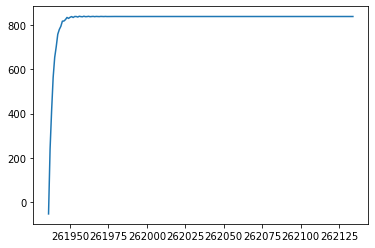

In [ ]:
# 결측치 처리 형태 확인 (첫번째 구간)

plt.plot(total[13], gangwha.iloc[total[13], 0])
plt.show()

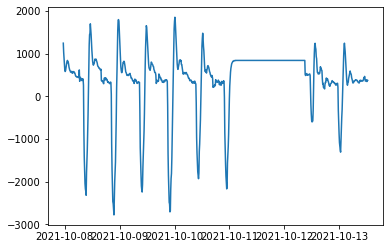

In [ ]:
plt.plot(gangwha[261500:262300])

In [ ]:
total[13]

In [ ]:
gangwha.to_csv('한강대교 유량_처리완료.csv')